<a href="https://colab.research.google.com/github/BhavaniPi/ee-packages-js/blob/main/Vietnam_CropDiversification_Factors_influence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Identify the key factors influencing crop diversity at the administration level 2 in Vietnam**
Using spatial crop production data, along with selected biophysical and socio-economic datasets

---

Author: **Dr.Bhavani**
mail id: pbhavani24@gmail.com; B.pinjarala@cgiar.org


# **Dataset Used**


*Sources of Data are*
1.  Agricutlutral Statistic data: https://www.gso.gov.vn/en/px-web/?pxid=E0613&theme=Agriculture%2C%20Forestry%20and%20Fishing
2. Vietnam Boundary https://www.diva-gis.org/datadown

3. Irrigation Data:https://datacatalog.worldbank.org/search/dataset/0039827/Global-Map-of-Irrigation-Areas;

4. Crop Data:(Becker-Reshef, I., Barker, B., Whitcraft, A., Oliva, P., Mobley, K., Justice, C., & Sahajpal, R. (2022). GEOGLAM Best Available Crop Type Masks (1.0.0) [Data set]. Zenodo. https://doi.org/10.5281/zenodo.7230863)

5. SOC:OpenLandMap/SOL/SOL_ORGANIC-CARBON_USDA-6A1C_M/v02;

6. elevation USGS/GMTED2010

7.  SoilPh OpenLandMap/SOL/SOL_PH-H2O_USDA-4C1A2A_M/v02

8.  Crop mask from ESA ESA/WorldCover/v100,

9. Weater data (Temperature (max, min), precipitation , soil,Actual evapotranspiration,runoff,) from TERRACLIMATE,

10. Slope Global ALOS_landforms.

Data 5-10 are imported from GEE



Note:Download from Mapspam https://mapspam.info/data/ not working presently


## 0.Data processing and Model

1. Crop Diversiton Index (CDI)computed using agriculture statstic information i.e.  *production data of paddy, Maize, sugarcane, sweet potato, cassava,peanut,and cereals*. CDI generated using *simpson diversity index*
1.   Extracted the biophysical , socio-economiac and weather data at level 2 of
     study are using  GEE platform.
2.   Exported the data as CSV at admin level 2.




### 0.1 Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Import libraries
## Basic libs
import pandas as pd
import numpy as np
import warnings
## Building Model
from sklearn import linear_model
from scipy import stats
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
## Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 0.2 Importing the dataset from goole drive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# redading the csv file using pandas
dataset = pd.read_csv('/content/drive/MyDrive/Vietnam/FinalData_CDI.csv')
dataset

,ADM1_EN,Aquaculture_Aquaculture/Fishery harvested area 2021,Number of farms by kinds of eco_2022 Cultivation farm,Number of farms by kinds of eco_2022 Livestock farm,Number of farms by kinds of eco_2022 Fishing farm,Number of farms by kinds of eco_2022 Others(*),Planted area of paddy,cassava_Planted area of cassava2021,peanut_Planted area of peanut2021,sweet potatoes_Planted area of sweet potatoes 2021,...,Data_CD_202112_tmmx,Data_CD_SOC,Data_CD_elevation,Data_CD_irrigation,Data_CD_maize_pro,Data_CD_rice_pro,Data_CD_slope,Data_CD_soilph,Data_CD_soyabean_pro,Population
0,An Giang,1.5,755,0,79,2,624.9,0.7,0,98,...,312,28,261,79.71,1082,10000,34,61,5,2226059
1,Ba Ria - Vung Tau,6.7,91,203,21,4,24.0,7.1,0,91,...,307,23,169,5.79,2850,6600,41,66,0,0
2,Bac Giang,9.8,35,449,18,21,99.7,1.5,8576,4057,...,222,5,132,40.48,1033,10000,34,60,302,1625573
3,Bac Kan,1.2,0,0,0,0,22.9,0.4,592,538,...,191,6,545,0.00,591,500,31,56,303,299618
4,Bac Lieu,143.3,39,10,286,0,191.0,0.0,0,368,...,305,14,6,69.03,16,10000,34,64,0,800460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Tra Vinh,31.7,48,22,624,0,209.0,0.0,0,1217,...,306,13,6,70.82,235,10000,34,68,0,1052882
59,Tuyen Quang,3.4,182,111,0,42,44.2,2.1,4569,2496,...,226,7,420,6.01,914,5400,32,60,705,736265
60,Vinh Long,2.3,12,89,2,0,134.5,0.2,0,8444,...,312,11,7,84.56,107,10000,34,62,0,1100326
61,Vinh Phuc,6.5,7,691,14,23,53.7,0.0,2192,1779,...,226,6,93,26.70,1942,10000,34,60,942,1189089


In [5]:
# list  all the column names
list(dataset.columns)

['ADM1_EN',
 'Aquaculture_Aquaculture/Fishery harvested area 2021',
 'Number of farms by kinds of eco_2022 Cultivation farm',
 'Number of farms by kinds of eco_2022 Livestock farm',
 'Number of farms by kinds of eco_2022 Fishing farm',
 'Number of farms by kinds of eco_2022 Others(*)',
 'Planted area of paddy ',
 'cassava_Planted area of cassava2021',
 'peanut_Planted area of peanut2021',
 'sweet potatoes_Planted area of sweet potatoes 2021',
 'sugar cane_Planted area of sugar-cane',
 'sugar cane_Production of sugar-cane2021',
 'cassava_Production of cassava',
 'peanut_Production of peanut 2021',
 'sweet potatoes_Production of sweet potatoes',
 'Production _Production of cereals2021',
 'Production _Maize_Production',
 'Production _Production of paddy',
 'CDI',
 'Data_CD_202101_aet',
 'Data_CD_202101_pr',
 'Data_CD_202101_ro',
 'Data_CD_202101_soil',
 'Data_CD_202101_tmmn',
 'Data_CD_202101_tmmx',
 'Data_CD_202102_aet',
 'Data_CD_202102_pr',
 'Data_CD_202102_ro',
 'Data_CD_202102_soil',

### 0.3 Check if any null value

In [6]:
dataset.isna().sum()

ADM1_EN                                                  0
Aquaculture_Aquaculture/Fishery harvested area 2021      0
Number of farms by kinds of eco_2022 Cultivation farm    0
Number of farms by kinds of eco_2022 Livestock farm      0
Number of farms by kinds of eco_2022 Fishing farm        0
                                                        ..
Data_CD_rice_pro                                         0
Data_CD_slope                                            0
Data_CD_soilph                                           0
Data_CD_soyabean_pro                                     0
Population                                               0
Length: 100, dtype: int64

In [ ]:
dataset.info()

In [ ]:
# Drop NA
dataset=dataset.dropna()

### 0.4 Determinants of crop diversification
# Assign X and Y variables

In [7]:
# Filter the varibles into Y and X
# Filter the dataset into dependent variable ' CDI (crop diversification index)'
# and independent variables
# here avaiable production data also dropeed

X = dataset.drop(['CDI','ADM1_EN',
                  'Data_CD_maize_pro', 'Data_CD_rice_pro',
  'Data_CD_soyabean_pro','sugar cane_Production of sugar-cane2021',
 'cassava_Production of cassava',
 'peanut_Production of peanut 2021',
 'sweet potatoes_Production of sweet potatoes',
 'Production _Production of cereals2021',
 'Production _Maize_Production',
 'Production _Production of paddy'
                  ], axis=1)
X

,Aquaculture_Aquaculture/Fishery harvested area 2021,Number of farms by kinds of eco_2022 Cultivation farm,Number of farms by kinds of eco_2022 Livestock farm,Number of farms by kinds of eco_2022 Fishing farm,Number of farms by kinds of eco_2022 Others(*),Planted area of paddy,cassava_Planted area of cassava2021,peanut_Planted area of peanut2021,sweet potatoes_Planted area of sweet potatoes 2021,sugar cane_Planted area of sugar-cane,...,Data_CD_202112_ro,Data_CD_202112_soil,Data_CD_202112_tmmn,Data_CD_202112_tmmx,Data_CD_SOC,Data_CD_elevation,Data_CD_irrigation,Data_CD_slope,Data_CD_soilph,Population
0,1.5,755,0,79,2,624.9,0.7,0,98,0,...,2,2801,240,312,28,261,79.71,34,61,2226059
1,6.7,91,203,21,4,24.0,7.1,0,91,0,...,1,2321,236,307,23,169,5.79,41,66,0
2,9.8,35,449,18,21,99.7,1.5,8576,4057,192,...,0,1253,149,222,5,132,40.48,34,60,1625573
3,1.2,0,0,0,0,22.9,0.4,592,538,74,...,0,1238,104,191,6,545,0.00,31,56,299618
4,143.3,39,10,286,0,191.0,0.0,0,368,0,...,2,1657,244,305,14,6,69.03,34,64,800460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,31.7,48,22,624,0,209.0,0.0,0,1217,0,...,1,2475,249,306,13,6,70.82,34,68,1052882
59,3.4,182,111,0,42,44.2,2.1,4569,2496,2239,...,1,1475,146,226,7,420,6.01,32,60,736265
60,2.3,12,89,2,0,134.5,0.2,0,8444,0,...,1,2692,242,312,11,7,84.56,34,62,1100326
61,6.5,7,691,14,23,53.7,0.0,2192,1779,3,...,1,1408,150,226,6,93,26.70,34,60,1189089


### 0.5 Handling Multicollinearity

In [8]:
 #corr() method finds the correlation of each column in a DataFrame.
df_corr = X.corr()
df_corr.head()

,Aquaculture_Aquaculture/Fishery harvested area 2021,Number of farms by kinds of eco_2022 Cultivation farm,Number of farms by kinds of eco_2022 Livestock farm,Number of farms by kinds of eco_2022 Fishing farm,Number of farms by kinds of eco_2022 Others(*),Planted area of paddy,cassava_Planted area of cassava2021,peanut_Planted area of peanut2021,sweet potatoes_Planted area of sweet potatoes 2021,sugar cane_Planted area of sugar-cane,...,Data_CD_202112_ro,Data_CD_202112_soil,Data_CD_202112_tmmn,Data_CD_202112_tmmx,Data_CD_SOC,Data_CD_elevation,Data_CD_irrigation,Data_CD_slope,Data_CD_soilph,Population
Aquaculture_Aquaculture/Fishery harvested area 2021,1.000000,-0.082210,-0.036475,0.525108,-0.014260,0.143662,-0.135900,-0.056378,-0.068961,-0.009541,...,-0.100554,-0.106270,0.247134,0.183488,-0.013125,-0.211079,0.098297,-0.140659,0.184171,0.110409
Number of farms by kinds of eco_2022 Cultivation farm,-0.082210,1.000000,0.212931,0.039913,-0.008525,0.599333,0.276475,-0.161053,0.068580,-0.073403,...,-0.190275,0.478981,0.330345,0.467064,0.145912,-0.020196,0.173287,-0.023666,-0.014516,0.322561
Number of farms by kinds of eco_2022 Livestock farm,-0.036475,0.212931,1.000000,0.096363,0.330461,0.070455,0.020359,0.127650,0.169214,0.067823,...,-0.156464,-0.177453,-0.153580,-0.138753,-0.140135,-0.145684,0.206807,-0.160082,-0.125514,0.272793
Number of farms by kinds of eco_2022 Fishing farm,0.525108,0.039913,0.096363,1.000000,-0.024786,0.369426,-0.189330,-0.088937,-0.019099,-0.074123,...,-0.127484,-0.026773,0.288621,0.206930,0.005210,-0.304533,0.366809,-0.190461,0.203436,0.158469
Number of farms by kinds of eco_2022 Others(*),-0.014260,-0.008525,0.330461,-0.024786,1.000000,0.050844,0.012539,0.490131,0.289928,0.413735,...,0.015293,-0.262384,-0.199885,-0.254254,-0.138373,-0.085314,-0.044875,-0.193040,0.085032,0.427071


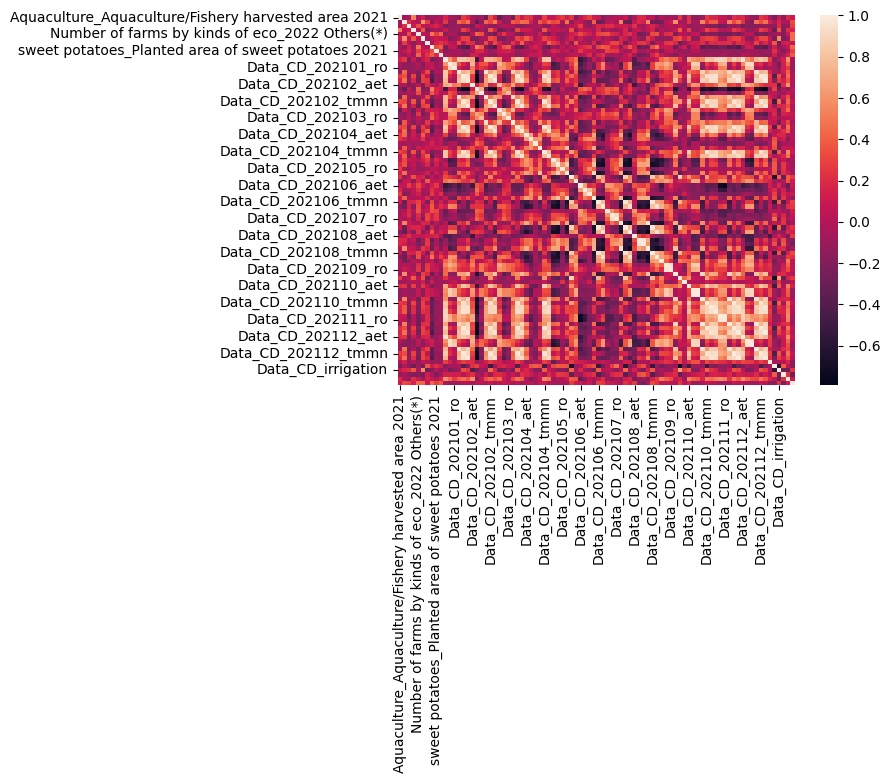

In [9]:
sns.heatmap(df_corr);

### 0.6 Drop highly correlated feature

In [10]:
# Drop highly correlated feature
threshold = 0.9


columns = np.full((df_corr.shape[0],), True, dtype=bool)
for i in range(df_corr.shape[0]):
    for j in range(i+1, df_corr.shape[0]):
        if df_corr.iloc[i,j] >= threshold:
            if columns[j]:
                columns[j] = False
selected_columns = X.columns[columns]
selected_columns
X_drop = X[selected_columns]
X_drop.head()

,Aquaculture_Aquaculture/Fishery harvested area 2021,Number of farms by kinds of eco_2022 Cultivation farm,Number of farms by kinds of eco_2022 Livestock farm,Number of farms by kinds of eco_2022 Fishing farm,Number of farms by kinds of eco_2022 Others(*),Planted area of paddy,cassava_Planted area of cassava2021,peanut_Planted area of peanut2021,sweet potatoes_Planted area of sweet potatoes 2021,sugar cane_Planted area of sugar-cane,...,Data_CD_202109_tmmn,Data_CD_202109_tmmx,Data_CD_202110_aet,Data_CD_202110_pr,Data_CD_SOC,Data_CD_elevation,Data_CD_irrigation,Data_CD_slope,Data_CD_soilph,Population
0,1.5,755,0,79,2,624.9,0.7,0,98,0,...,253,318,1191,323,28,261,79.71,34,61,2226059
1,6.7,91,203,21,4,24.0,7.1,0,91,0,...,246,314,1204,359,23,169,5.79,41,66,0
2,9.8,35,449,18,21,99.7,1.5,8576,4057,192,...,247,320,1082,249,5,132,40.48,34,60,1625573
3,1.2,0,0,0,0,22.9,0.4,592,538,74,...,216,305,954,215,6,545,0.00,31,56,299618
4,143.3,39,10,286,0,191.0,0.0,0,368,0,...,252,316,1197,297,14,6,69.03,34,64,800460


In [11]:
# Asign X variables after droping the highly correlated variable
X=X_drop
X

,Aquaculture_Aquaculture/Fishery harvested area 2021,Number of farms by kinds of eco_2022 Cultivation farm,Number of farms by kinds of eco_2022 Livestock farm,Number of farms by kinds of eco_2022 Fishing farm,Number of farms by kinds of eco_2022 Others(*),Planted area of paddy,cassava_Planted area of cassava2021,peanut_Planted area of peanut2021,sweet potatoes_Planted area of sweet potatoes 2021,sugar cane_Planted area of sugar-cane,...,Data_CD_202109_tmmn,Data_CD_202109_tmmx,Data_CD_202110_aet,Data_CD_202110_pr,Data_CD_SOC,Data_CD_elevation,Data_CD_irrigation,Data_CD_slope,Data_CD_soilph,Population
0,1.5,755,0,79,2,624.9,0.7,0,98,0,...,253,318,1191,323,28,261,79.71,34,61,2226059
1,6.7,91,203,21,4,24.0,7.1,0,91,0,...,246,314,1204,359,23,169,5.79,41,66,0
2,9.8,35,449,18,21,99.7,1.5,8576,4057,192,...,247,320,1082,249,5,132,40.48,34,60,1625573
3,1.2,0,0,0,0,22.9,0.4,592,538,74,...,216,305,954,215,6,545,0.00,31,56,299618
4,143.3,39,10,286,0,191.0,0.0,0,368,0,...,252,316,1197,297,14,6,69.03,34,64,800460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,31.7,48,22,624,0,209.0,0.0,0,1217,0,...,258,317,1219,402,13,6,70.82,34,68,1052882
59,3.4,182,111,0,42,44.2,2.1,4569,2496,2239,...,240,324,959,313,7,420,6.01,32,60,736265
60,2.3,12,89,2,0,134.5,0.2,0,8444,0,...,255,321,1202,367,11,7,84.56,34,62,1100326
61,6.5,7,691,14,23,53.7,0.0,2192,1779,3,...,247,320,995,360,6,93,26.70,34,60,1189089


In [12]:
# Asing Y variable "CDI"
y = dataset['CDI']#['CDI']
y

0     2.03
1     3.52
2     1.12
3     1.74
4     2.01
      ... 
58    2.07
59    1.13
60    2.53
61    1.33
62    1.54
Name: CDI, Length: 63, dtype: float64

### 0.7 Multiple  regression Model

In [ ]:
# MOdel Used is OLS
X = sm.add_constant(X) # adding a constant

olsmod = sm.OLS(y, X).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                    CDI   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.114
Method:                 Least Squares   F-statistic:                     1.150
Date:                Thu, 04 Jan 2024   Prob (F-statistic):              0.442
Time:                        13:37:36   Log-Likelihood:                -20.614
No. Observations:                  63   AIC:                             149.2
Df Residuals:                       9   BIC:                             265.0
Df Model:                          53                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

### 0.8 Results

CDI : Based on CDI generated for 2021 at level 12 of Vietnam : Shows *Phu Yen* is maximum crop diverised of 63 provinces of Vietnam.

1. No.of variables considrered after handling the multicollinary (dropped the highly corralated vairiables) are 53 (out of 99 variables)
2. Total no.observation are 63(63 provinices of vietnam)
3.  From the above Model summary:
> The coefficient of the independent variables having a positive sign are following i.e. *Population*,*sweet potatoes_Planted area of sweet potatoes 2021*,*sugar cane_Planted area of sugar-cane*,*Data_CD_202103_aet,Data_CD_202109_soil*,*Number of farms by kinds of eco_2022 Livestock farm,Data_CD_202109_aet*,*Planted area of paddy*,*Data_CD_202107_aet*,*Data_CD_202105_soil*,*Number of farms by kinds of eco_2022Fishingfarm*,*Data _CD_202104_soil*,*Data_CD_202105_tmmn*,*Data_CD_202102_aet*,*Data_ CD_ 202108 _aet*,*Data_CD_202110_aet*,*Number of farms by kinds of eco_2022 Others*,*Data_CD_202107_pr*,*Data_CD_202104_aet*,*Data_CD_202101_tmmn*,*Data_ CD_ 202106_pr*,*Data_CD_202104_ro*,*Data_CD_SOC,Data_CD_202103_ro*,*cassava_Planted area ofcassava2021*,*Data_CD_202101_pr*,*Data_CD_202105_ro*,*Data_ CD_ 202109_tmmn*,*Data_CD_202105_tmmx*,*Data_CD_slope*,*Data_CD_202102_ro*. (Crop Diversitivation is positively influeced by these variables). Wheras, population have a very mininal influce amoung all the positve (coeffient sign) variables.
4. Rest other variables have a negative impact on crop diversification. The least mininal influces is observed by *Data_CD_202109_tmmx*,  means the September  month maximim temperature have a least impact on crop diversification.   
5. R2 square: 0.87%. Here, 87 % variation in Y can be explained by X.
A R-Squared value of 0.87% means that 87% of the movement in the dependent variable can be explained by the independent variables tested. That means it would be highly predictive and could be said to be accurate.
6. As the p values is  greater than  0.05,  that we cannot conclude that the strong explanatory variable affects the dependent variable.
-----------------------------------------------------------------
With the current limited  avaiable information, the model is exceuted.
 Well ,  we can try improving the model with new indpendent soocio-economic  variables etc., and also testing with differnt models.



VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x_temp = sm.add_constant(X)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])]
vif["features"] = x_temp.columns
# print(vif.round(1))
# vif=pd.dataframe(vif)
vif

,VIF Factor,features
0,73484.110022,const
1,40.348925,Aquaculture_Aquaculture/Fishery harvested area...
2,31.048023,Number of farms by kinds of eco_2022 Cultivati...
3,3.586045,Number of farms by kinds of eco_2022 Livestock...
4,6.996836,Number of farms by kinds of eco_2022 Fishing farm
5,17.526910,Number of farms by kinds of eco_2022 Others(*)
6,20.079233,Planted area of paddy
7,24.015674,cassava_Planted area of cassava2021
8,18.755128,peanut_Planted area of peanut2021
9,6.800972,sweet potatoes_Planted area of sweet potatoes ...


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

                                              feature           VIF
0                                               const  73484.110022
1   Aquaculture_Aquaculture/Fishery harvested area...     40.348925
2   Number of farms by kinds of eco_2022 Cultivati...     31.048023
3   Number of farms by kinds of eco_2022 Livestock...      3.586045
4   Number of farms by kinds of eco_2022 Fishing farm      6.996836
5      Number of farms by kinds of eco_2022 Others(*)     17.526910
6                              Planted area of paddy      20.079233
7                 cassava_Planted area of cassava2021     24.015674
8                   peanut_Planted area of peanut2021     18.755128
9   sweet potatoes_Planted area of sweet potatoes ...      6.800972
10              sugar cane_Planted area of sugar-cane      5.935044
11                                 Data_CD_202101_aet    512.623243
12                                  Data_CD_202101_pr    462.551133
13                                Data_CD_202101

In [ ]:

vif.sort_values(by=['VIF Factor'])

,VIF Factor,features
3,3.586045,Number of farms by kinds of eco_2022 Livestock...
10,5.935044,sugar cane_Planted area of sugar-cane
9,6.800972,sweet potatoes_Planted area of sweet potatoes ...
4,6.996836,Number of farms by kinds of eco_2022 Fishing farm
53,10.157455,Population
51,10.561495,Data_CD_slope
52,15.424900,Data_CD_soilph
23,15.546935,Data_CD_202104_ro
5,17.526910,Number of farms by kinds of eco_2022 Others(*)
50,18.718137,Data_CD_irrigation


In [ ]:
X_vif=X.filter(['Number of farms by kinds of eco_2022 Livestock farm ','sugar cane_Planted area of sugar-cane',
                'sweet potatoes_Planted area of sweet potatoes 2021',
                'Number of farms by kinds of eco_2022 Fishing farm',
                'Population','Data_CD_slope','Data_CD_soilph','Data_CD_202104_ro'])
X_vif = sm.add_constant(X_vif) # adding a constant

olsmod = sm.OLS(y, X_vif).fit()
print(olsmod.summary())

                            OLS Regression Results                            
Dep. Variable:                    CDI   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     1.492
Date:                Thu, 04 Jan 2024   Prob (F-statistic):              0.189
Time:                        13:40:59   Log-Likelihood:                -79.725
No. Observations:                  63   AIC:                             175.5
Df Residuals:                      55   BIC:                             192.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------